# Machine Learning Exercise 1 - Linear Regression

In [1]:
## Linear regression with one variable

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit']) # pandas dataframe
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


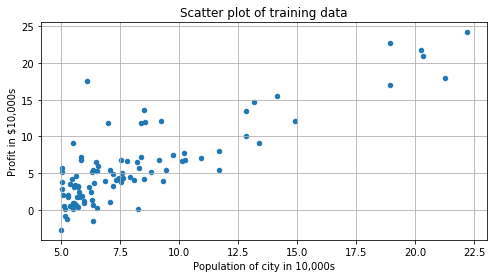

In [5]:
ax = data.plot(kind='scatter', x='Population', y='Profit', title='Scatter plot of training data', 
               figsize=(8, 4), grid=True)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')

## Gradient Descent

First, you create a function to compute the cost of a given solution (characterized by the parameters beta):

In [6]:
def compute_cost(X, y, beta):
    m = X.shape[0]
    h = X * beta.transpose()
    return (0.5/m)*np.sum(np.power(h - y, 2))
    # m = y.size
    # h = X.dot(beta.T)
    # return (0.5 * m)*h.T.dot(h)

We store each example as a row in the X matrix. To take into account the intercept term (\beta0), we add an additional first column to X and set it to all ones. This allows us to treat \beta0 as simply another 'feature'.

In [7]:
data.insert(0, 'beta zero', 1)

Now let's do some variable initialization

In [8]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

Now, you need to guarantee that X (training set) and y (target variable) are correct.

In [9]:
X.head()

,beta zero,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize beta.

In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)
beta = np.matrix(np.array([0.0, 0.0]))

Here's what beta looks like.

In [12]:
beta

matrix([[ 0.,  0.]])

Let's take a quick look at the shape of our matrices.

In [13]:
X.shape, beta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for beta).

In [14]:
compute_cost(X, y, beta)

32.072733877455676

Now, you are asked to define a function to perform gradient descent on the parameters beta

In [15]:
def gradient_descent(X, y, theta, alpha, iters):
    '''
    alpha: learning rate
    iters: number of iterations
    OUTPUT:
    theta: learned parameters
    cost:  a vector with the cost at each training iteration
    '''
    
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    temp = np.matrix(np.zeros(theta.shape))
        
    for i in range(iters):
        h = X * theta.transpose()        
        n = X.shape[0]        
        for j in range(parameters):
            temp[:, j] = (h - y).transpose() * X[:, j]
        theta -= alpha * temp / n
        cost[i] = compute_cost(X, y, theta)        
        
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform

In [16]:
alpha = 0.01
iters = 1500

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [17]:
g, cost = gradient_descent(X[0,:], y[0], beta, alpha, iters)

In [18]:
g

matrix([[ 0.45892187,  2.80405855]])

In [19]:
g, cost = gradient_descent(X, y, beta, alpha, iters)
g

matrix([[-3.61857447,  1.16518525]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [20]:
compute_cost(X, y, g)

4.4839671532797301

Now let's plot the linear model along with the data to visually see how well it fits.

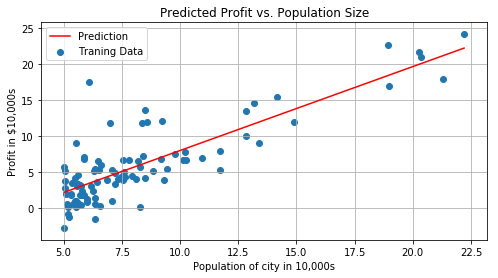

In [21]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')
ax.grid(True)

Looks pretty good! Remember that the gradient decent function also outputs a vector with the cost at each training iteration, we can plot it as well. 

Since the cost always decreases - this is an example of a convex optimization problem.

In [22]:
def plot_cost_error(iters, cost):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(np.arange(iters), cost, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_ylim(4.0)
    ax.set_title('Error vs. Training Epoch')
    ax.grid(True)

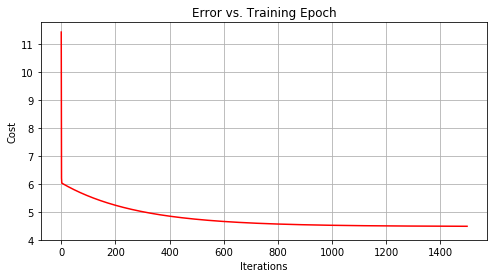

In [23]:
plot_cost_error(iters, cost)

Now, we will show a contour plot that presents beta0 against beta1 and the outcome of J. First, we set values for beta0 and beta1

In [24]:
beta0_vals = np.linspace(-10, 10, 100)
beta1_vals = np.linspace(-1, 4, 100)

Now, initialize J values to a matrix of 0's

In [25]:
j_vals = np.zeros([len(beta0_vals), len(beta1_vals)])

In [26]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = np.matrix(np.array([beta0_vals[i], beta1_vals[j]]))
        j_vals[i,j] = compute_cost(X, y, t)

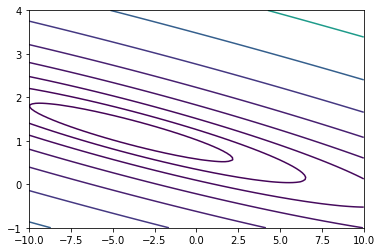

In [27]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

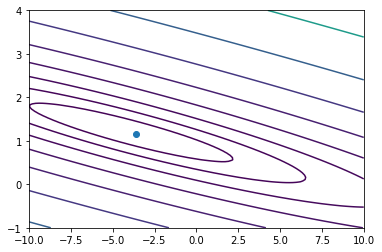

In [28]:
plt.scatter(g[0,0],g[0,1],)
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

Now, in 3D

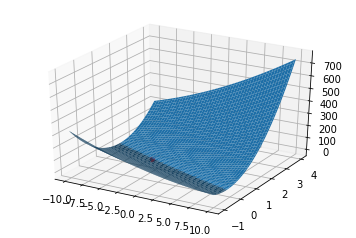

In [29]:
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T)
ax.scatter(g[0,0],g[0,1],color='r')

## Linear regression with multiple variables

From now on, you will use the second dataset, i.e., ex1data2.txt. This is a housing price dataset with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house). You are asked to use the techniques already applied to analyze that data set.

In [30]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Following the same steps now let´s visualize these data:

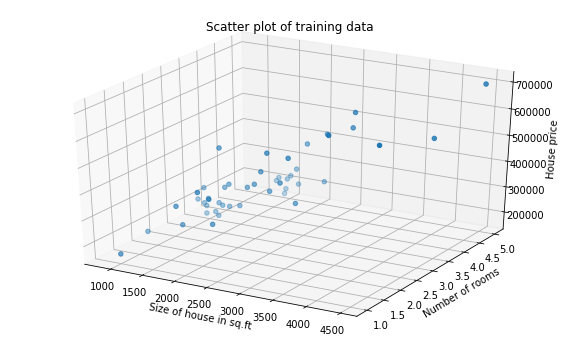

In [31]:
ax = plt.figure(figsize=(10, 6)).gca(projection='3d')
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price']) 

ax.set_xlabel('Size of house in sq.ft')
ax.set_ylabel('Number of rooms')
ax.set_zlabel('House price')
ax.set_title('Scatter plot of training data')

For this task we add another pre-processing step - normalizing the features.

Notice that the scale of the values for each feature is vastly large. A house will typically have 2-5 bedrooms, but may have anywhere from hundreds to thousands of square feet. If we use the features as they are in the dataset, the 'size' feature would too much wheighted and would end up dwarfing any contributions from the 'number of bedrooms' feature. To fix this, we need to do something called 'feature normalization'. That is, we need to adjust the scale of the features to level the playing field. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation.

In [32]:
def feature_normalize(data):
    sigma = data.std()
    mu = data.mean()
    return (data - mu) / sigma, mu, sigma

In [33]:
data3, _, _ = feature_normalize(data2)
data3.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Given that you were asked to implement both cost function and gradient descent using matrix operations, your previously implementations will work just fine in the multivariate dataset. Hence, you need now insert the 'ones' column as before and separate the X's and the y's.

Conduct the rest of this exercise by repeating the experiments conducted in the simple linear dataset...

In [34]:
data3.insert(0, 'beta zero', 1)
cols = data3.shape[1]
X = data3.iloc[:, 0:cols-1]
y = data2.iloc[:, cols-2:cols-1]  # the house value must not be normalized
X = np.matrix(X.values)
y = np.matrix(y.values)

In [35]:
print("X[0, :]: {0}".format(X[0, :]))
print("y[0]: {0}".format(y[0]))

X[0, :]: [[ 1.          0.13000987 -0.22367519]]
y[0]: [[399900]]


In [36]:
beta = np.matrix(np.zeros([1, X.shape[1]]))
beta

matrix([[ 0.,  0.,  0.]])

In [37]:
alpha = 0.1
iters = 50

g, cost = gradient_descent(X, y, beta, alpha, iters)
g

matrix([[  3.38658249e+05,   1.04127516e+05,  -1.72205334e+02]])

Now let´s try the model to predict a single house price. With the following features:
- Size: 1650 sq.ft
- Bedrooms: 3

In [38]:
data = np.array([[1650, 3]])
test_house = pd.DataFrame(data = data, index=range(1), columns=['Size', 'Bedrooms'])  # Predicit a house price outside the database
test_data = test_house.append(data2.iloc[:, 0:2])  # Normalize just one value isn´t feasible, it´s suposed to be always one.

test_data, _, _ = feature_normalize(test_data)
test_data.insert(0, 'beta zero', 1)

X3 = np.matrix(test_data.values)

test_f = (X3[0, :] * g.transpose())
test_f

matrix([[ 293312.48510295]])

So... In the Andrew Ng course the expected result it´s a bittle different. 
It´s supposed to be $402476.75. But he normalize a single house. 
Once there is no standard deviation to a single element, so the values became questionable.

In [39]:
x13 = np.linspace(data3.Size.min(), data3.Size.max(), 100)
x23 = np.linspace(data3.Bedrooms.min(), data3.Bedrooms.max(), 20)

x12 = np.linspace(data2.Size.min(), data2.Size.max(), 100)
x22 = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 20)

x13v, x23v = np.meshgrid(x13, x23)
x12v, x22v = np.meshgrid(x12, x22)
x13.shape, x23.shape, x13v.shape, x23v.shape

((100,), (20,), (20, 100), (20, 100))

In [40]:
f = g[0, 0] + (g[0, 1] * x13v) + (g[0, 2] * x23v)

In [41]:
f.shape

(20, 100)

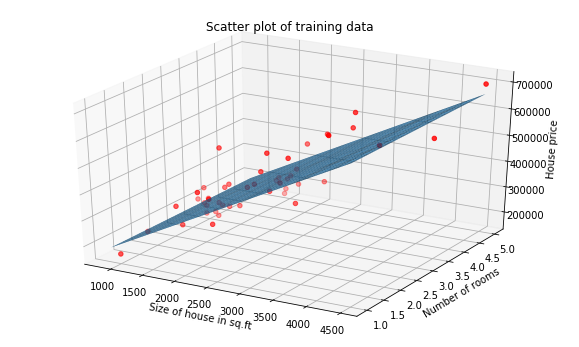

In [42]:
ax = plt.figure(figsize=(10, 6)).gca(projection='3d')
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'], color='r') 

ax.set_xlabel('Size of house in sq.ft')
ax.set_ylabel('Number of rooms')
ax.set_zlabel('House price')
ax.set_title('Scatter plot of training data')

ax.plot_surface(x12v, x22v, f)


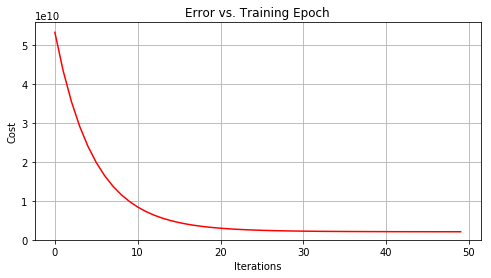

In [43]:
plot_cost_error(iters, cost)

Now, we will show a contour plot that presents beta0 against beta1 againt beta2 and the outcome of J. First, we set values for beta0, beta1 and beta3.

In [44]:
beta0_vals = np.linspace(-3, 3, 100)
beta1_vals = np.linspace(-3, 3, 100)
beta2_vals = np.linspace(-3, 3, 100)

In [45]:
j_vals = np.zeros([len(beta0_vals), len(beta1_vals), len(beta2_vals)])

In [46]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        for k in range(len(beta2_vals)):
            t = np.matrix(np.array([beta0_vals[i], beta1_vals[j], beta2_vals[k]]))
            j_vals[i, j, k] = compute_cost(X, y, t)

TypeError: Input z must be a 2D array.

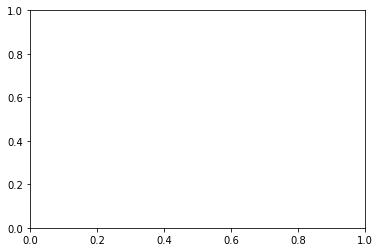

In [47]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));


## A real world dataset

In [132]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [133]:
groupon_data = pd.read_csv('groupon-deals.csv')
groupon_data.head()

,url,city,value,you_save,discount_pct,num_sold,limited_quantity,sold_out,tipped_at,tips_with,started_at,weekday_start,duration,featured,category,likes
0,http://www.groupon.com/atlanta/deals/buckhead-...,Atlanta,30,15,50,108,0,0,10:26:00,25,1/3/2011,Mon,1,1,Nightlife,14.0
1,http://www.groupon.com/atlanta/deals/european-...,Atlanta,70,35,50,255,0,0,7:26:00,10,1/3/2011,Mon,1,0,Beauty & Spas,20.0
2,http://www.groupon.com/atlanta/deals/orchard-h...,Atlanta,99,54,55,352,0,0,8:41:00,20,1/3/2011,Mon,2,0,Health & Fitness,28.0
3,http://www.groupon.com/atlanta/deals/spa-bolena,Atlanta,65,35,54,501,0,0,7:15:00,20,1/3/2011,Mon,1,0,Beauty & Spas,27.0
4,http://www.groupon.com/atlanta/deals/the-stova...,Atlanta,134,67,50,359,1,0,1:50:00,5,1/3/2011,Mon,2,0,Travel,36.0


In [134]:
groupon_data.shape

(16692, 16)

Now we will transform the categorical values into binary vectors.

In [135]:
def one_hot_encoding(df, column):
    categories = df[column].unique()
    for x in range(len(categories)):
        df[categories[x]] = (groupon_data[column] == categories[x]) * 1  # plus one to force to be an integer


In [136]:
one_hot_encoding(groupon_data, 'category')
groupon_data.head()

,url,city,value,you_save,discount_pct,num_sold,limited_quantity,sold_out,tipped_at,tips_with,...,Restaurants,Arts and Entertainment,Other,Home Services,Automotive,Pets,Real Estate,Financial Services,Public Services & Government,Legal Services
0,http://www.groupon.com/atlanta/deals/buckhead-...,Atlanta,30,15,50,108,0,0,10:26:00,25,...,0,0,0,0,0,0,0,0,0,0
1,http://www.groupon.com/atlanta/deals/european-...,Atlanta,70,35,50,255,0,0,7:26:00,10,...,0,0,0,0,0,0,0,0,0,0
2,http://www.groupon.com/atlanta/deals/orchard-h...,Atlanta,99,54,55,352,0,0,8:41:00,20,...,0,0,0,0,0,0,0,0,0,0
3,http://www.groupon.com/atlanta/deals/spa-bolena,Atlanta,65,35,54,501,0,0,7:15:00,20,...,0,0,0,0,0,0,0,0,0,0
4,http://www.groupon.com/atlanta/deals/the-stova...,Atlanta,134,67,50,359,1,0,1:50:00,5,...,0,0,0,0,0,0,0,0,0,0


In [137]:
one_hot_encoding(groupon_data, 'weekday_start')
groupon_data.head()

,url,city,value,you_save,discount_pct,num_sold,limited_quantity,sold_out,tipped_at,tips_with,...,Financial Services,Public Services & Government,Legal Services,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,http://www.groupon.com/atlanta/deals/buckhead-...,Atlanta,30,15,50,108,0,0,10:26:00,25,...,0,0,0,1,0,0,0,0,0,0
1,http://www.groupon.com/atlanta/deals/european-...,Atlanta,70,35,50,255,0,0,7:26:00,10,...,0,0,0,1,0,0,0,0,0,0
2,http://www.groupon.com/atlanta/deals/orchard-h...,Atlanta,99,54,55,352,0,0,8:41:00,20,...,0,0,0,1,0,0,0,0,0,0
3,http://www.groupon.com/atlanta/deals/spa-bolena,Atlanta,65,35,54,501,0,0,7:15:00,20,...,0,0,0,1,0,0,0,0,0,0
4,http://www.groupon.com/atlanta/deals/the-stova...,Atlanta,134,67,50,359,1,0,1:50:00,5,...,0,0,0,1,0,0,0,0,0,0


In [138]:
one_hot_encoding(groupon_data, 'city')
groupon_data.head()

,url,city,value,you_save,discount_pct,num_sold,limited_quantity,sold_out,tipped_at,tips_with,...,New York City,Orlando,Philadelphia,San Diego,San Francisco,San Jose,Seattle,Tallahassee,Vancouver,Washington DC
0,http://www.groupon.com/atlanta/deals/buckhead-...,Atlanta,30,15,50,108,0,0,10:26:00,25,...,0,0,0,0,0,0,0,0,0,0
1,http://www.groupon.com/atlanta/deals/european-...,Atlanta,70,35,50,255,0,0,7:26:00,10,...,0,0,0,0,0,0,0,0,0,0
2,http://www.groupon.com/atlanta/deals/orchard-h...,Atlanta,99,54,55,352,0,0,8:41:00,20,...,0,0,0,0,0,0,0,0,0,0
3,http://www.groupon.com/atlanta/deals/spa-bolena,Atlanta,65,35,54,501,0,0,7:15:00,20,...,0,0,0,0,0,0,0,0,0,0
4,http://www.groupon.com/atlanta/deals/the-stova...,Atlanta,134,67,50,359,1,0,1:50:00,5,...,0,0,0,0,0,0,0,0,0,0


In [139]:
categories = groupon_data['category'].unique().reshape(-1, 1).tolist()
categories

[['Nightlife'],
 ['Beauty & Spas'],
 ['Health & Fitness'],
 ['Travel'],
 ['Shopping'],
 ['Professional Services'],
 ['Education'],
 ['Food & Drink'],
 ['Restaurants'],
 ['Arts and Entertainment'],
 ['Other'],
 ['Home Services'],
 ['Automotive'],
 ['Pets'],
 ['Real Estate'],
 ['Financial Services'],
 ['Public Services & Government'],
 ['Legal Services']]

In [140]:
weekday = groupon_data['weekday_start'].unique().reshape(-1, 1).tolist()
weekday

[['Mon'], ['Tue'], ['Wed'], ['Thu'], ['Fri'], ['Sat'], ['Sun']]

In [141]:
city = groupon_data['city'].unique()
city

array(['Atlanta', 'Boston', 'Chicago', 'Dallas', 'Detroit', 'Houston',
       'Las Vegas', 'Los Angeles', 'Miami', 'New Orleans', 'New York City',
       'Orlando', 'Philadelphia', 'San Diego', 'San Francisco', 'San Jose',
       'Seattle', 'Tallahassee', 'Vancouver', 'Washington DC'], dtype=object)

In [142]:
#  escalar_columns = ["value", "discount_pct", "duration", "you_save", "likes"]
escalar_columns = ["discount_pct", "you_save", "value"]
#  categorical_columns = ["featured", "limited_quantity"]
categorical_columns = []
#  categorical_columns += [x[0] for x in weekday]
#  categorical_columns += [x[0] for x in categories]
#  categorical_columns += [x for x in city]

desired_columns = escalar_columns.copy()
#  desired_columns += [x for x in categorical_columns]
desired_columns += ["num_sold"]
desired_columns

['discount_pct', 'you_save', 'value', 'num_sold']

In [143]:
#  cols_names = ["city", "city_bin", "value", "discount_pct", "duration", "featured", "limited_quantity", "weekday_start", "weekday_start_bin", "category", "category_bin", "city_bin", "num_sold"]
#  cols_names = ["city_bin", "value", "discount_pct", "duration", 
#                "featured", "limited_quantity", "weekday_start_bin", "category_bin", "city_bin", "num_sold"]
#  cols_names = ["value", "discount_pct", "duration", 
#               "featured", "limited_quantity", "num_sold"]
#  cols_names = ["value", "discount_pct", "duration", "num_sold"]
groupon_data = groupon_data.dropna(axis=0)  # axis = 0 means we drop lines
groupon_data = groupon_data.loc[:, desired_columns] 
groupon_data.head()

,discount_pct,you_save,value,num_sold
0,50,15,30,108
1,50,35,70,255
2,55,54,99,352
3,54,35,65,501
4,50,67,134,359


In [144]:
groupon_data.describe()

,discount_pct,you_save,value,num_sold
count,15875.000000,15875.000000,15875.000000,15875.000000
mean,56.156976,80.831748,128.894677,691.466331
std,10.027035,185.238714,284.973228,1606.329879
min,0.000000,0.000000,4.000000,0.000000
25%,50.000000,15.000000,30.000000,131.000000
50%,51.000000,30.000000,55.000000,317.000000
75%,60.000000,75.000000,127.000000,738.000000
max,99.000000,4901.000000,6000.000000,75221.000000


In [145]:
groupon_data.isnull().sum()

discount_pct    0
you_save        0
value           0
num_sold        0
dtype: int64

In [146]:
train_data = groupon_data.sample(frac=0.8, random_state=200)
test_data  = groupon_data.drop(train_data.index)

In [147]:
train_data_norm = train_data.copy()
train_data_norm[escalar_columns], _, _ = feature_normalize(train_data[escalar_columns])
train_data_norm["num_sold"], _, _ = feature_normalize(train_data["num_sold"])
cols = train_data_norm.shape[1]
train_data_norm.insert(0, 'beta zero', 1)
train_data_norm.head()

,beta zero,discount_pct,you_save,value,num_sold
1743,1,-0.612869,2.904755,3.865481,-0.403580
4730,1,-0.413237,-0.353380,-0.347054,0.096546
10106,1,0.485104,-0.107684,-0.102099,-0.395940
10822,1,-0.013974,-0.193143,-0.171101,-0.331294
7355,1,-0.313421,-0.166437,-0.119350,0.176472


In [148]:
train_data_norm.shape

(12700, 5)

In [149]:
train_data_norm.dropna(how='any')
train_data_norm.shape

(12700, 5)

In [150]:
train_data_norm.isnull().sum()

beta zero       0
discount_pct    0
you_save        0
value           0
num_sold        0
dtype: int64

In [151]:
train_data_norm.describe()

,beta zero,discount_pct,you_save,value,num_sold
count,12700.0,1.270000e+04,1.270000e+04,1.270000e+04,1.270000e+04
mean,1.0,-7.049479e-17,3.077154e-17,3.356895e-18,-3.412843e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-5.603655e+00,-4.334976e-01,-4.333059e-01,-4.112198e-01
25%,1.0,-6.128686e-01,-3.533795e-01,-3.436041e-01,-3.343791e-01
50%,1.0,-5.130528e-01,-2.732614e-01,-2.573524e-01,-2.260969e-01
75%,1.0,3.852887e-01,-3.290728e-02,-8.947362e-03,2.425988e-02
max,1.0,4.278102e+00,2.574374e+01,1.852828e+01,4.379555e+01


Once we have multiple features, isn´t factive plot a n-D graph.
But let´s choose two features, just to have a partial view.

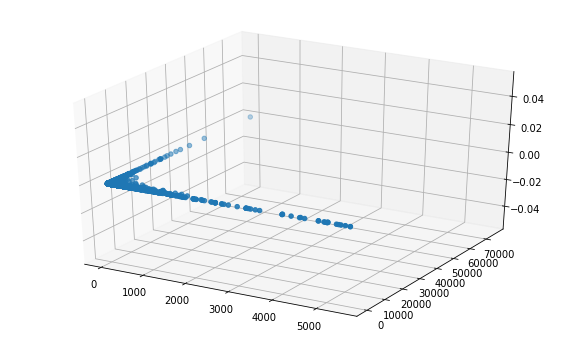

In [152]:
ax = plt.figure(figsize=(10, 6)).gca(projection='3d')
ax.scatter(train_data['value'], train_data['num_sold']) 

Analyzing the values we can perceive small ranges, so I will try not normalize the data before.

In [153]:
cols = train_data_norm.shape[1]
X = train_data_norm.iloc[:, 0:cols-1]
y = train_data_norm.iloc[:, cols-1:cols]  # the house value must not be normalized
X.head()

,beta zero,discount_pct,you_save,value
1743,1,-0.612869,2.904755,3.865481
4730,1,-0.413237,-0.353380,-0.347054
10106,1,0.485104,-0.107684,-0.102099
10822,1,-0.013974,-0.193143,-0.171101
7355,1,-0.313421,-0.166437,-0.119350


In [154]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [155]:
print("First line features values: X[0, :]: {0}".format(X[0, :]))
print("First line result: y[0]: {0}".format(y[0]))

First line features values: X[0, :]: [[ 1.         -0.61286858  2.90475472  3.86548087]]
First line result: y[0]: [[-0.40357985]]


In [156]:
alpha = 0.01
iters = 1500
beta = np.matrix(np.zeros([1, X.shape[1]]))
beta

matrix([[ 0.,  0.,  0.,  0.]])

In [157]:
g, cost = gradient_descent(X, y, beta, alpha, iters)
g

matrix([[ -3.32332587e-17,  -2.61374185e-02,   1.77437626e-02,
          -8.96810986e-02]])

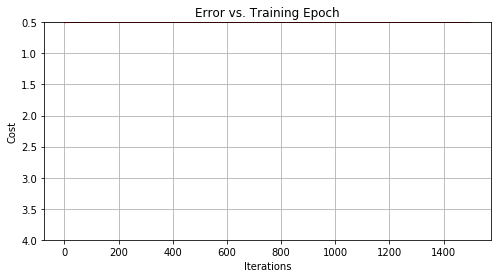

In [158]:
plot_cost_error(iters, cost)

In [ ]:
x13 = np.linspace(data3.Size.min(), data3.Size.max(), 100)
x23 = np.linspace(data3.Bedrooms.min(), data3.Bedrooms.max(), 20)

x12 = np.linspace(data2.Size.min(), data2.Size.max(), 100)
x22 = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 20)

x13v, x23v = np.meshgrid(x13, x23)
x12v, x22v = np.meshgrid(x12, x22)
x13.shape, x23.shape, x13v.shape, x23v.shape

In [ ]:
q = 
t = 
d = 
f = 
l = 
w = 
c = 
g = 

In [107]:
q = g[0, 0] + (g[0, 1] * np.log(q)) + (g[0, 2] * log(t)) + (g[0, 3] * log(d)) + (g[0, 4] * f) + (g[0, 5] * l) + (g[0, 6] * w) + (g[0, 7] * c) + (g[0, 8] * g)

NameError: name 'g' is not defined